# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044
* Nicolas Tonizzo - 107280

Importamos las librerias y creamos el dataframe

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_test.csv')

hotel = df.copy()


### Análisis Exploratorio y Preprocesamiento de Datos

#### Exploración inicial

In [8]:
#Datos nulos
hotel.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              95
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3363
company                           25218
days_in_waiting_list                  0


'company' tiene muchos datos faltantes, puede que sea una variable irrelevante para el análisis

In [9]:
#Datos no nulos
hotel.notna().sum()

hotel                             26535
lead_time                         26535
arrival_date_year                 26535
arrival_date_month                26535
arrival_date_week_number          26535
arrival_date_day_of_month         26535
stays_in_weekend_nights           26535
stays_in_week_nights              26535
adults                            26535
children                          26535
babies                            26535
meal                              26535
country                           26440
market_segment                    26535
distribution_channel              26535
is_repeated_guest                 26535
previous_cancellations            26535
previous_bookings_not_canceled    26535
reserved_room_type                26535
assigned_room_type                26535
booking_changes                   26535
deposit_type                      26535
agent                             23172
company                            1317
days_in_waiting_list              26535


In [12]:
#Tipo de dato de las variables
hotel.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [15]:
#Medidas de resumen del dataframe
hotel.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,23172.000000,1317.000000,26535.000000,26535.000000,26535.000000,26535.000000
mean,112.066516,2016.161673,27.183908,15.783682,0.928660,2.520595,1.870737,0.100622,0.006633,0.027398,0.104993,0.112078,0.196043,82.753711,188.217160,2.387337,102.640680,0.045902,0.515621
std,110.151002,0.711078,13.468782,8.771971,1.005711,1.901415,0.631651,0.391135,0.099904,0.163243,0.896411,1.331426,0.645858,109.150519,135.133925,17.353234,57.395732,0.209995,0.765220
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,61.000000,0.000000,70.000000,0.000000,0.000000
50%,79.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,174.000000,0.000000,95.000000,0.000000,0.000000
75%,171.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,191.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,14.000000,35.000000,50.000000,3.000000,10.000000,1.000000,26.000000,68.000000,21.000000,531.000000,534.000000,391.000000,5400.000000,2.000000,5.000000


In [18]:
hotel.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,NaN,NaN,0,Transient,100.0,0,0,Canceled,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,30.0,NaN,176,Transient-Party,101.0,0,0,Canceled,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,NaN,NaN,0,Transient,225.0,0,2,Check-Out,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad


In [52]:
# Estado de las reservas por cada hotel
pd.crosstab(hotel['hotel'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
hotel,,,
City Hotel,9721,8305,269
Resort Hotel,3210,4947,83


City Hotel tiene mas del doble de reservas canceladas que el Resort Hotel

In [87]:
# ¿Cuál es la proporción de reservas canceladas en relación con el total de reservas?

prop_cancelaciones = len(hotel[hotel['reservation_status'] == 'Canceled']) / len(hotel) *100
print(f"La proporción de reservas canceladas en relación al total de reservas es {prop_cancelaciones:.2f}%")

La proporción de reservas canceladas en relación al total de reservas es 48.73%


In [74]:
#¿Existe alguna relación entre el tiempo de espera en lista de espera y la probabilidad de que una reserva se cancele?
pd.crosstab(hotel['days_in_waiting_list'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
days_in_waiting_list,,,
0,12212,13036,352
39,72,0,0
44,37,7,0
31,36,0,0
35,36,1,0
...,...,...,...
49,0,6,0
99,0,1,0
259,0,2,0


In [50]:
# Estado de las reservas por tipo de cliente
pd.crosstab(hotel['customer_type'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
customer_type,,,
Transient,10654,9381,275
Transient-Party,1893,3291,64
Contract,372,502,12
Group,12,78,1


El tipo de cliente que más cancela es el de tipo Transient

In [54]:
# Estado de las reservas por tarifa
pd.crosstab(hotel['adr'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
adr,,,
62.00,922,153,0
90.00,478,148,3
75.00,341,269,14
80.00,316,149,2
110.00,307,114,1
...,...,...,...
128.25,0,2,0
128.22,0,1,0
128.16,0,1,0


In [55]:
# Estado de las reservas por pais
pd.crosstab(hotel['country'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
country,,,
PRT,8077,3736,216
GBR,750,1627,10
ESP,641,1109,7
FRA,581,1524,13
ITA,401,461,6
...,...,...,...
CRI,0,2,0
SLV,0,2,0
SMR,0,1,0


In [58]:
# Estado de las reservas segun si es un cliente repetido
pd.crosstab(hotel['is_repeated_guest'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
is_repeated_guest,,,
0,12795,12673,340
1,136,579,12


In [60]:
# Estado de las reservas segun el tipo de deposito
pd.crosstab(hotel['deposit_type'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
deposit_type,,,
No Deposit,8550,13218,344
Non Refund,4374,15,7
Refundable,7,19,1


In [61]:
# Estado de las reservas segun el tipo de habitacion
pd.crosstab(hotel['assigned_room_type'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
assigned_room_type,,,
A,9736,7275,207
D,1835,3403,78
E,546,1008,22
F,272,474,18
G,213,299,5
B,138,296,5
C,117,316,12
H,67,65,3
P,5,0,0


In [98]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)


reservation_status,Canceled,Check-Out,No-Show
meal,,,
BB,10078,10263,288
HB,1479,1596,19
SC,1151,1174,44
FB,144,60,1
Undefined,79,159,0


In [106]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['reservation_status']).sort_values(by='Canceled', ascending=False)

reservation_status,Canceled,Check-Out,No-Show
distribution_channel,,,
TA/TO,11782,10209,259
Direct,731,2085,63
Corporate,408,931,29
GDS,10,27,1


In [121]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['reservation_status']).sort_values(by='Canceled', ascending=False).head(10)


reservation_status      Canceled  Check-Out  No-Show
adults children babies                              
2      0.0      0           9590       8666      195
1      0.0      0           1794       2838      118
3      0.0      0            599        692       12
2      2.0      0            409        292        6
       1.0      0            376        470       16
3      1.0      0             50         53        2
2      0.0      1             30         93        0
0      2.0      0             22         21        1
1      1.0      0             18         30        0
       2.0      0             10         20        1

In [125]:
# Correlacion de pearson
df['previous_cancellations'].corr(df['reservation_status'].map({'Check-Out': 0, 'Canceled': 1, 'No-Show': 1}))

0.10118406119645683

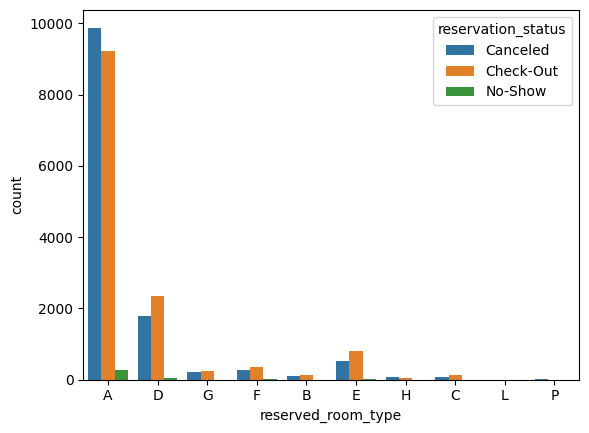

In [133]:
sns.countplot(x='reserved_room_type', hue='reservation_status', data=df)
plt.show()

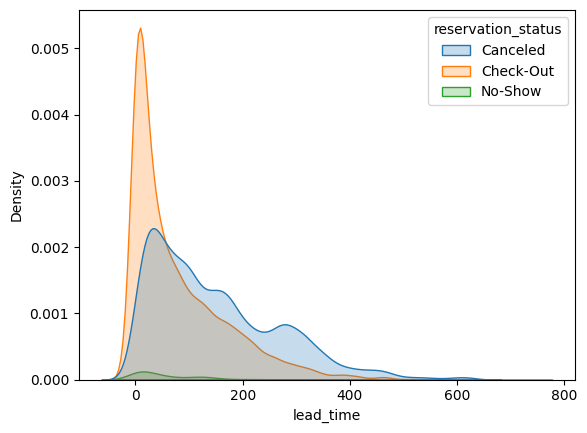

In [134]:
sns.kdeplot(data=df, x='lead_time', hue='reservation_status', fill=True)
plt.show()


In [141]:
pd.crosstab(index=[hotel['assigned_room_type'], hotel['reserved_room_type']], columns=hotel['reservation_status']).sort_values(by='Canceled', ascending=False).head(10)


,reservation_status,Canceled,Check-Out,No-Show
assigned_room_type,reserved_room_type,,,
A,A,9733,7198,206
D,D,1768,2117,52
E,E,532,718,14
F,F,264,326,9
G,G,211,218,2
B,B,100,119,2
C,C,85,104,2
D,A,67,1277,26
H,H,66,48,2


In [143]:
pd.crosstab(index=[hotel['stays_in_week_nights'], hotel['stays_in_weekend_nights']], columns=hotel['reservation_status']).sort_values(by='Canceled', ascending=False).head(10)

reservation_status                            Canceled  Check-Out  No-Show
stays_in_week_nights stays_in_weekend_nights                              
2                    0                            2577       1729       30
3                    0                            1428       1215       13
1                    0                            1183       2114       73
2                    1                            1100        915       20
5                    2                             846       1001       14
1                    1                             823        772       16
                     2                             821        682       27
2                    2                             774        717       21
3                    1                             634        732       16
4                    0                             483        490        8

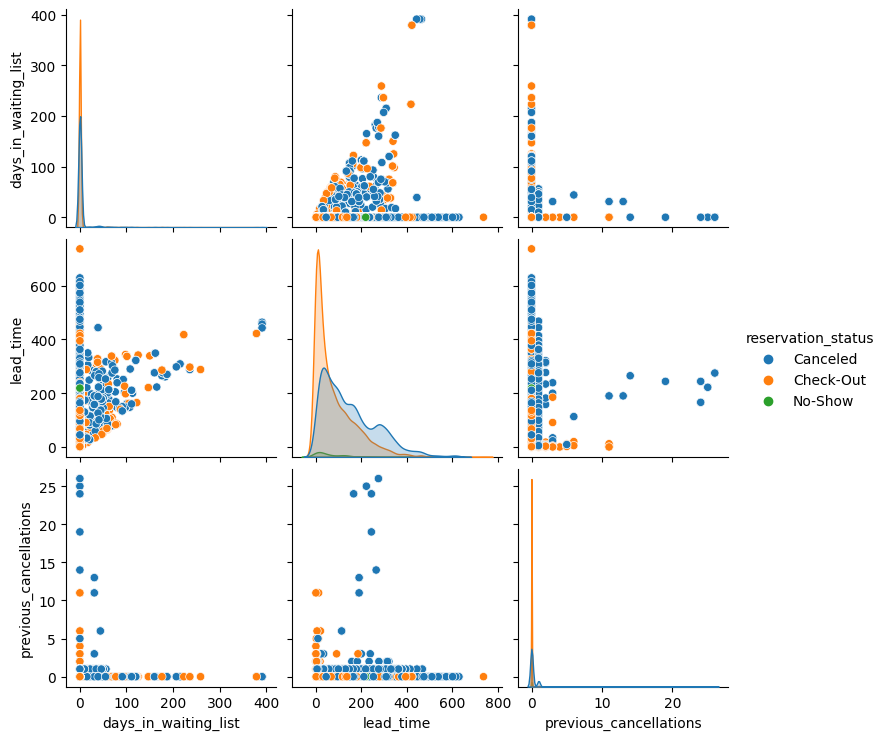

In [151]:
sns.pairplot(hotel[['days_in_waiting_list', 'lead_time', 'country', 'previous_cancellations', 'reservation_status']], hue='reservation_status', dropna = True)

plt.show()